# Homework 9 for Perspective
## Qian Zhang

In [1]:
# import the packages

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform as sp_uniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Question 1

In [2]:
# load the data

df = pd.read_csv('data/strongdrink.txt')
df.dropna()
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### (a)

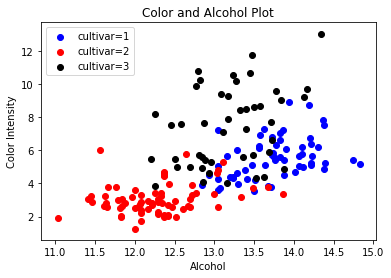

In [3]:
# set the colors

color={1: 'blue', 2: 'red', 3:'black'}

# plot the scatter

for i in range(1,4):
    temp=df[df['cultivar']==i]
    plt.scatter(temp['alco'],temp['color_int'],c=color[i],label='cultivar='+str(i))

plt.legend()
plt.xlabel("Alcohol") 
plt.ylabel("Color Intensity")
plt.title("Color and Alcohol Plot")
plt.show()

### (b)

In [4]:
# set the variables

X = df[['alco','malic','tot_phen','color_int']]
y = df['cultivar']

# fit the logit model

logit_culti = LogisticRegression(solver='lbfgs',multi_class='multinomial', random_state=25)
param_dist1 = {'penalty': ['l1', 'l2'], 'C': sp_uniform(0.1, 10.0)}
rscv1 = RandomizedSearchCV(logit_culti, param_dist1, 
            n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')


rscv1.fit(X, y)
print('Optimal tuning parameter values from logit:\n', rscv1.best_params_)
print('MSE of the optimal results from logit:', abs(rscv1.best_score_))

Optimal tuning parameter values from logit:
 {'C': 9.565064414817147, 'penalty': 'l2'}
MSE of the optimal results from logit: 0.09571428571428572


### (c)

In [5]:
# fit a random forest model

param_dist2 = {'n_estimators': sp_randint(10, 200),
               'max_depth': sp_randint(2, 4),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}
rf_culti = RandomForestClassifier(bootstrap=True, oob_score=True, random_state=25)
rscv2 = RandomizedSearchCV(rf_culti, param_dist2, 
         n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rscv2.fit(X, y)
print('Optimal tuning parameter values from random forest:\n', rscv2.best_params_)
print('MSE of the optimal results from random forest:', abs(rscv2.best_score_))

Optimal tuning parameter values from random forest:
 {'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 18, 'min_samples_split': 17, 'n_estimators': 127}
MSE of the optimal results from random forest: 0.13047619047619047


### (d)

In [6]:
# fit a svc model

param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}

svc_culti = SVC(kernel='rbf')
rscv3 = RandomizedSearchCV(svc_culti, param_dist3, 
        n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rscv3.fit(X, y)
print('Optimal tuning parameter values from svc:\n', rscv3.best_params_)
print('MSE of the optimal results from svc:', abs(rscv3.best_score_))

Optimal tuning parameter values from svc:
 {'C': 8.801241366272118, 'gamma': 'scale', 'shrinking': False}
MSE of the optimal results from svc: 0.1461904761904762


### (e)

In [7]:
# fit a neural network model

param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}

mlp_culti = MLPClassifier(solver='lbfgs',max_iter=1000)
rscv4 = RandomizedSearchCV(mlp_culti, param_dist4, 
        n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

rscv4.fit(X, y)
print('Optimal tuning parameter values from neural network:\n', rscv4.best_params_)
print('MSE of the optimal results from neural network:', abs(rscv4.best_score_))

Optimal tuning parameter values from neural network:
 {'activation': 'relu', 'alpha': 0.47362547312722036, 'hidden_layer_sizes': 57}
MSE of the optimal results from neural network: 0.08952380952380953


### (f)

In [8]:
# report the MSE of different models
print('MSE of the optimal results from logit:', abs(rscv1.best_score_))
print('MSE of the optimal results from random forest:', abs(rscv2.best_score_))
print('MSE of the optimal results from svc:', abs(rscv3.best_score_))
print('MSE of the optimal results from neural network:', abs(rscv4.best_score_))

MSE of the optimal results from logit: 0.09571428571428572
MSE of the optimal results from random forest: 0.13047619047619047
MSE of the optimal results from svc: 0.1461904761904762
MSE of the optimal results from neural network: 0.08952380952380953


From the comparison, the neural network model has the smallest MSE, so we could say that it predicts `cultivar` best.